In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
col_interest = ['Pressure (MPa)','Density (kg/m3)', 'Sound Spd. (m/s)']
CO2_25 = pd.read_csv('data/co2/25/co2_25.txt', delimiter="\t")
CO2_25 = CO2_25[col_interest]
CO2_25.columns = ['Pressure (MPa)', 'Density_CO2 (kg/m3)', 'Sound Spd_CO2 (m/s)' ]
CO2_35 = pd.read_csv('data/co2/35/co2_35.txt', delimiter="\t")
CO2_35 = CO2_35[col_interest]
CO2_35.columns = ['Pressure (MPa)', 'Density_CO2 (kg/m3)', 'Sound Spd_CO2 (m/s)']
H2O_25 = pd.read_csv('data/H2O/25/h2o_25.txt', delimiter="\t")
H2O_25 = H2O_25[col_interest]
H2O_25.columns = ['Pressure (MPa)', 'Density_H2O (kg/m3)', 'Sound Spd_H2O (m/s)']
H2O_35 = pd.read_csv('data/H2O/35/h2o_35.txt', delimiter="\t")
H2O_35 = H2O_35[col_interest]
H2O_35.columns = ['Pressure (MPa)', 'Density_H2O (kg/m3)', 'Sound Spd_H2O (m/s)']

In [3]:
H2O_25.head(10)

,Pressure (MPa),Density_H2O (kg/m3),Sound Spd_H2O (m/s)
0,0.00000,0.000000,427.63
1,0.00317,0.023075,426.63
2,0.00317,997.000000,1496.50
3,1.00000,997.450000,1498.20
4,2.00000,997.900000,1499.90
5,3.00000,998.350000,1501.60
6,4.00000,998.800000,1503.20
7,5.00000,999.250000,1504.90
8,6.00000,999.690000,1506.60
9,7.00000,1000.100000,1508.30


### Cairnside physical properties

In [4]:
porosity = 0.0335
grain_density = 2.632 * 1000 # Kg/m3

#  read velocities from laboratory measurments
Vp_25 = pd.read_csv('data/CAS/25/Vp.dat', sep="  ", names=['Pressure (MPa)','Vp_CO2 (m/s)'], header=None)
Vs_25 = pd.read_csv('data/CAS/25/Vs.dat', sep="  ", names=['Pressure (MPa)','Vs_CO2 (m/s)'], header=None)
Vp_35 = pd.read_csv('data/CAS/35/Vp.dat', sep="  ", names=['Pressure (MPa)','Vp_CO2 (m/s)'], header=None)
Vs_35 = pd.read_csv('data/CAS/35/Vs.dat', sep="  ", names=['Pressure (MPa)','Vs_CO2 (m/s)'], header=None)
# concatenate velocities
V_25 = pd.merge(Vp_25, Vs_25, on='Pressure (MPa)')
V_35 = pd.merge(Vp_35, Vs_35, on='Pressure (MPa)')
# concatenate physical properties
pp_25 = pd.merge(CO2_25, H2O_25, on='Pressure (MPa)')
pp_35 = pd.merge(CO2_35, H2O_35, on='Pressure (MPa)')
pp_25 = pd.merge(pp_25, V_25, on='Pressure (MPa)')
pp_35 = pd.merge(pp_35, V_35, on='Pressure (MPa)')
pp_25

/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anacon

,Pressure (MPa),Density_CO2 (kg/m3),Sound Spd_CO2 (m/s),Density_H2O (kg/m3),Sound Spd_H2O (m/s),Vp_CO2 (m/s),Vs_CO2 (m/s)
0,2.0,39.773,253.06,997.90,1499.9,4636.5729,3246.9851
1,3.0,64.091,243.76,998.35,1501.6,4632.6235,3243.1127
2,4.0,93.349,233.28,998.80,1503.2,4620.8156,3239.2496
3,5.0,131.270,220.79,999.25,1504.9,4605.1651,3229.6318
4,6.0,190.610,203.43,999.69,1506.6,4601.2690,3227.7151
5,7.0,743.030,320.36,1000.10,1508.3,4660.4113,3243.1127
6,8.0,776.640,369.05,1000.60,1509.9,4696.6321,3250.8667
7,9.0,799.650,404.05,1001.00,1511.6,4708.8312,3252.8110
8,11.0,832.570,456.41,1001.90,1514.9,4749.9563,3264.5258
9,13.0,856.870,496.64,1002.80,1518.3,4758.2677,3270.4149


In [5]:
# Density of CO2 saturated sample
pp_25['Density_rock (kg/m3)'] = pp_25['Density_CO2 (kg/m3)'] * porosity + grain_density * (1-porosity)
pp_35['Density_rock (kg/m3)'] = pp_35['Density_CO2 (kg/m3)'] * porosity + grain_density * (1-porosity)

In [6]:
# Impedence of CO2 saturated sample
pp_25['Z_CO2 (kg/m3 . m/s)'] = pp_25['Density_rock (kg/m3)'] * pp_25['Vp_CO2 (m/s)']
pp_35['Z_CO2 (kg/m3 . m/s)'] = pp_35['Density_rock (kg/m3)'] * pp_35['Vp_CO2 (m/s)']

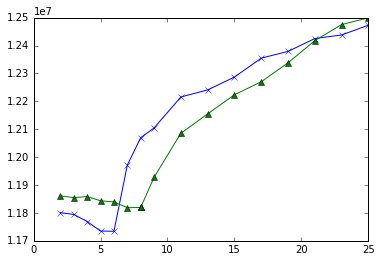

In [7]:
plt.plot(pp_25['Pressure (MPa)'], pp_25['Z_CO2 (kg/m3 . m/s)'], marker='x')
plt.plot(pp_35['Pressure (MPa)'], pp_35['Z_CO2 (kg/m3 . m/s)'], marker='^')

### Water velocities calculations @ 25ºC

In [8]:
pp_25

,Pressure (MPa),Density_CO2 (kg/m3),Sound Spd_CO2 (m/s),Density_H2O (kg/m3),Sound Spd_H2O (m/s),Vp_CO2 (m/s),Vs_CO2 (m/s),Density_rock (kg/m3),Z_CO2 (kg/m3 . m/s)
0,2.0,39.773,253.06,997.90,1499.9,4636.5729,3246.9851,2545.160396,1.180082e+07
1,3.0,64.091,243.76,998.35,1501.6,4632.6235,3243.1127,2545.975048,1.179454e+07
2,4.0,93.349,233.28,998.80,1503.2,4620.8156,3239.2496,2546.955192,1.176901e+07
3,5.0,131.270,220.79,999.25,1504.9,4605.1651,3229.6318,2548.225545,1.173500e+07
4,6.0,190.610,203.43,999.69,1506.6,4601.2690,3227.7151,2550.213435,1.173422e+07
5,7.0,743.030,320.36,1000.10,1508.3,4660.4113,3243.1127,2568.719505,1.197129e+07
6,8.0,776.640,369.05,1000.60,1509.9,4696.6321,3250.8667,2569.845440,1.206962e+07
7,9.0,799.650,404.05,1001.00,1511.6,4708.8312,3252.8110,2570.616275,1.210460e+07
8,11.0,832.570,456.41,1001.90,1514.9,4749.9563,3264.5258,2571.719095,1.221555e+07
9,13.0,856.870,496.64,1002.80,1518.3,4758.2677,3270.4149,2572.533145,1.224080e+07


In [9]:
### Gassmann parameters for Vp_h2o calculation
K_dry = 18.70 * 1e9# Gpa
K_s = 62.76 *1e9 #Gpa
K_h2o = (pp_25['Sound Spd_H2O (m/s)']**2 * pp_25['Density_H2O (kg/m3)'] ) 
G = 19.36 * 1e9# Gpa

upper = (1 - (K_dry/K_s))**2
lower = (porosity/K_h2o) + ((1-porosity)/K_s) - (K_dry/K_s**2)
K = K_dry + (upper)/(lower)

Vp = np.sqrt((K + 4/3*G) / pp_25['Density_rock (kg/m3)'])
Vs = np.sqrt(G / pp_25['Density_rock (kg/m3)'])

In [10]:
Vp

0     5006.118501
1     5006.516081
2     5006.691317
3     5006.639333
4     5005.877916
5     4988.985006
6     4989.043903
7     4989.460965
8     4990.703753
9     4992.280632
10    4993.948153
11    4995.722376
12    4997.547140
13    4999.419217
14    5001.340239
15    5003.275676
dtype: float64

In [11]:
Vs

0     2758.005311
1     2757.564027
2     2757.033380
3     2756.346070
4     2755.271575
5     2745.328602
6     2744.727126
7     2744.315573
8     2743.727093
9     2743.292947
10    2742.942922
11    2742.646221
12    2742.387265
13    2742.156570
14    2741.947513
15    2741.756157
Name: Density_rock (kg/m3), dtype: float64

(4950, 5050)

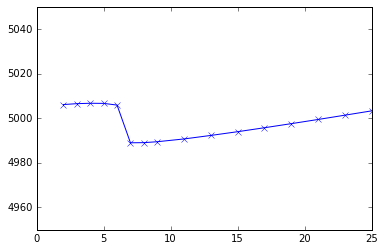

In [16]:
plt.plot(pp_25['Pressure (MPa)'], Vp, marker='x')
plt.ylim([4950, 5050])
# plt.plot(pp_25['Pressure (MPa)'], Vs, marker='^')